# Simple Linear Regression Assignment¶
# Data Set - delivery_time(1).csv


# Delivery_time -> Predict delivery time using sorting time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from ml_metrics import rmse

In [2]:
deltime = pd.read_csv('C:\\Users\\SUBRAT PATRA\\Downloads\\delivery_time (1).csv')
deltime.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Null value and data types check

In [3]:
deltime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


There is no Null value present in side the data set and also the data types are appropriate in all attributes

# Rename of column name


In [4]:
#rename the Delivery Time column as DT and Sorting Time Column as ST
deltime1 = deltime.rename({'Delivery Time': 'DT','Sorting Time': 'ST'}, axis=1)

In [5]:
deltime1.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Check and Drop the duplicate values if present in side the data set

In [6]:
#Print the duplicated rows
deltime1[deltime1.duplicated(keep = False)]

,DT,ST


Hence as per above process we found that there is no duplicate values are present inside the data set

# Correlation

In [7]:
deltime1.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


# Outlier checking

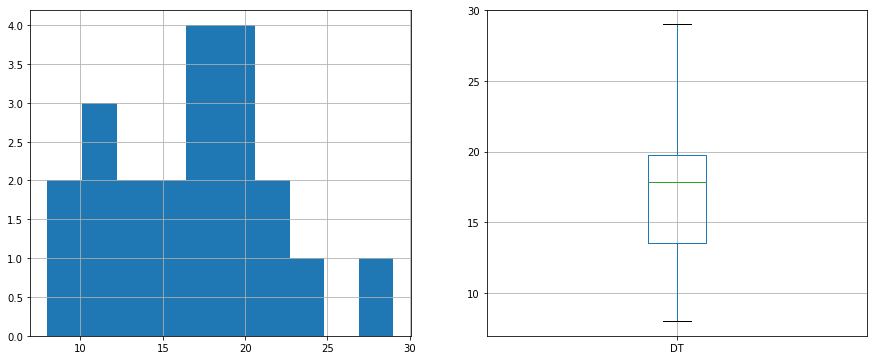

In [8]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
deltime1['DT'].hist()
plt.subplot(1,2,2)
deltime1.boxplot(column=['DT'])

plt.show()

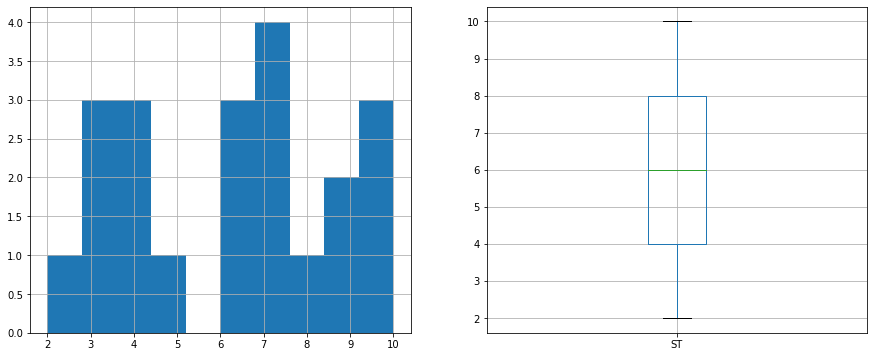

In [9]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
deltime1['ST'].hist()
plt.subplot(1,2,2)
deltime1.boxplot(column=['ST'])

plt.show()

From the above histogrms and boxplots, we found that there is no outleirs present inside the DT(Delivery Time) and ST (Sorting Time) variable.

# Cheking of distribution of data using distplot

C:\Users\SUBRAT PATRA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

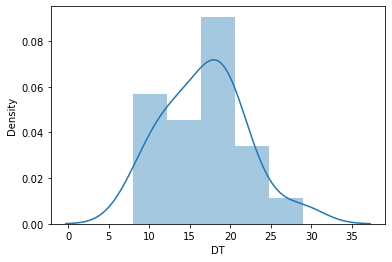

In [10]:
sns.distplot(deltime1['DT'])

C:\Users\SUBRAT PATRA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

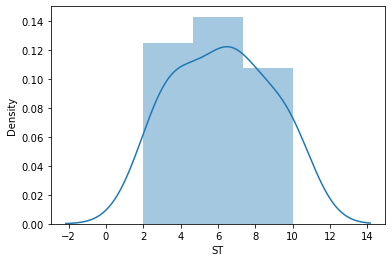

In [11]:
sns.distplot(deltime1['ST'])

# Try to fit model for Delivery_time

# Model1
# Predict this model without applying transformation

In [12]:
model1 = smf.ols('DT~ST', data = deltime1).fit()

In [13]:
model1

# Regresssion Plot 

<AxesSubplot:xlabel='ST', ylabel='DT'>

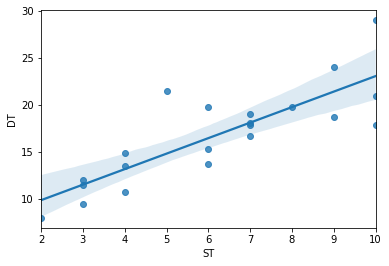

In [17]:
sns.regplot(x="ST", y="DT", data = deltime1 )

# Coefficients

In [18]:
model1.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [19]:
#t & p-values
print(model1.tvalues, '\n', model1.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [20]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [21]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           3.98e-06
Time:                        19:56:44   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here from the above OLS regression results R-Squared value is 0.682 which is not greater than 0.85 hence we its clear that this model1 is not good for predict Delivery TIme.
Here p value is less than 0.05, it is significant

# Checking the RMSE value

In [22]:
pred1 = model1.predict(deltime1.ST)

In [23]:
pred1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [24]:
actual = deltime1.DT

In [25]:
rmse(pred1,actual)

2.7916503270617654

lets apply Transformation on variables to get higher R-squared value as to predict better model

# Model 2
# applying logarthimic transformation

In [26]:
model2 = smf.ols('DT~np.log(ST)', data = deltime1).fit()

# Coefficients

In [27]:
model2.params

Intercept     1.159684
np.log(ST)    9.043413
dtype: float64

In [28]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           2.64e-06
Time:                        20:02:27   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here as per the above result in this case R-squared value is 0.695 which is greater than our model1 but not greater than 0.85. We can say model2 is better than model1.but not the best fit model to predict Delivery_time

# Checking of RMSE value

In [29]:
pred2 = model2.predict(deltime1.ST)
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [30]:
rmse(pred2,actual)

2.733171476682066

As in model2 the R-squared value is not good. So we need to do another transformation to get better R-squared value.

# model 3
# applying exponenential transformation

In [31]:
model3 = smf.ols('DT~np.exp(ST)', data = deltime1).fit()

# Coefficients

In [32]:
model3.params

Intercept     15.083578
np.exp(ST)     0.000393
dtype: float64

In [33]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Sun, 24 Jan 2021   Prob (F-statistic):            0.00396
Time:                        20:05:55   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(ST)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Here as per above result in this case R-squared value is 0.361 which is lesser than 0.85. We cannot take this model to predict Delivery_time

# checking for RMSE value

In [44]:
pred3 = model3.predict(deltime1.ST)
pred3

0     23.739082
1     15.105033
2     15.242109
3     18.267760
4     23.739082
5     15.242109
6     15.514510
7     15.091471
8     23.739082
9     18.267760
10    16.254973
11    15.105033
12    15.514510
13    15.091471
14    15.091471
15    15.105033
16    15.242109
17    15.514510
18    15.086482
19    15.514510
20    15.141898
dtype: float64

In [45]:
rmse(pred3,actual)

3.958615702523664

As in model3 the R-squared value is not good. So we need to do another transformation to get better R-squared value.

# Model4
# We need to do another transformation to get better R-squared value.
# Applying exponential transformation in other way and predict a new model

In [46]:
model4 = smf.ols('np.log(DT)~ST', data = deltime1).fit()

# Coefficients

In [47]:
model4.params

Intercept    2.121372
ST           0.105552
dtype: float64

In [48]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           1.59e-06
Time:                        20:16:49   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Here as per above result in this case R-squared value is 0.711.
# p- values is less than 0.05, it is significant

# Checking RMSE value and predict delivery time

In [51]:
pred4 = np.exp(model4.predict(deltime1.ST))
pred4

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [52]:
rmse(pred4,actual)

2.940250323056201

Conclusion - Comparing between all models , model4 has higher R-squared value i.e. 0.711 as comapare to others.
From the above data we know higher R-squred value and lower RMSE value gives better model.
Hence the model4 is better model to predict delivery_time.